In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset
df = pd.read_csv("E:\Data Science\Assignments\SVM\SVM\mushroom.csv")

In [3]:
df.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [4]:
# Removing the Unnamed column
df.drop(columns=['Unnamed: 0'],axis=1,inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   cap_shape                 2000 non-null   object 
 1   cap_surface               2000 non-null   object 
 2   cap_color                 2000 non-null   object 
 3   bruises                   2000 non-null   object 
 4   odor                      2000 non-null   object 
 5   gill_attachment           2000 non-null   object 
 6   gill_spacing              2000 non-null   object 
 7   gill_size                 2000 non-null   object 
 8   gill_color                2000 non-null   object 
 9   stalk_shape               2000 non-null   object 
 10  stalk_root                2000 non-null   object 
 11  stalk_surface_above_ring  2000 non-null   object 
 12  stalk_surface_below_ring  2000 non-null   object 
 13  stalk_color_above_ring    2000 non-null   object 
 14  stalk_co

Observation : All the features are in 'Object' type except 2 features.

In [6]:
df.columns

Index(['cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor',
       'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat', 'class',
       'stalk_height', 'cap_diameter'],
      dtype='object')

In [7]:
Columns = ['cap_shape', 'cap_surface', 'cap_color', 'bruises',
       'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat', 'class',
       'stalk_height', 'cap_diameter']

In [8]:
df.describe()

,stalk_height,cap_diameter
count,2000.000000,2000.000000
mean,8.449118,12.314345
std,3.697217,7.048845
min,2.000000,1.000000
25%,5.291009,5.723521
50%,8.318596,12.124902
75%,11.781272,18.698605
max,15.095066,25.000054


In [9]:
# No.of mushrooms are posisonous/edible in the data

df['class'].value_counts()

class
poisonous    1400
edible        600
Name: count, dtype: int64

#### Histograms for all columns

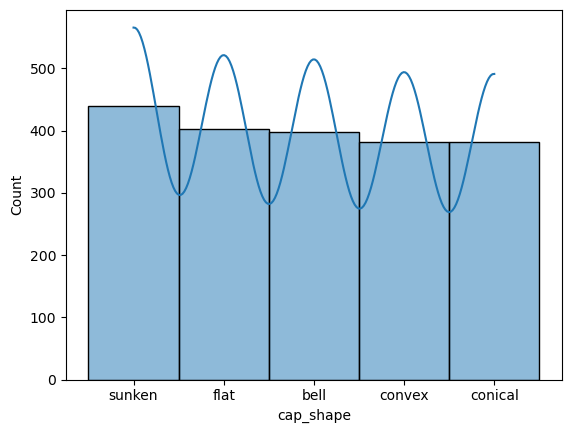

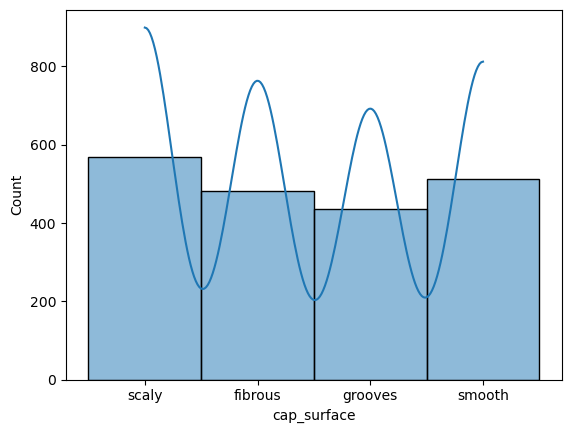

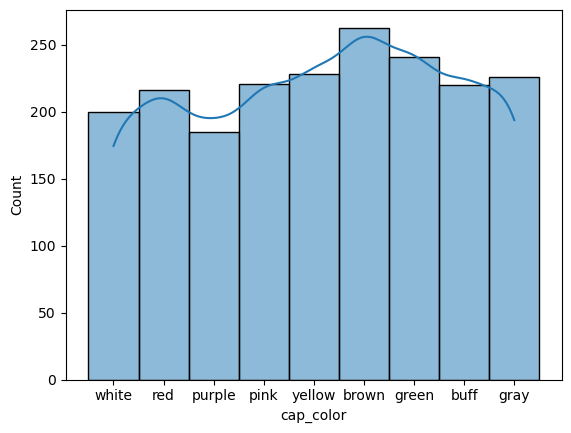

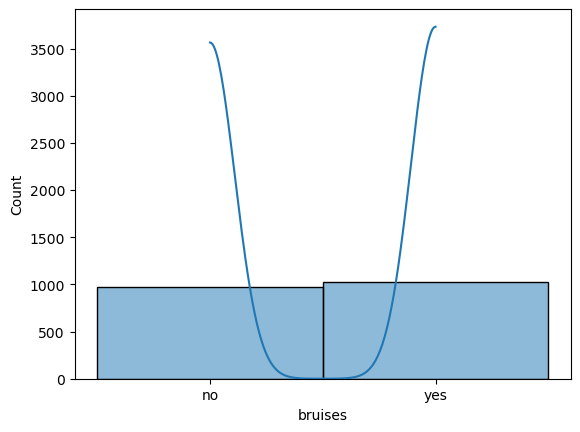

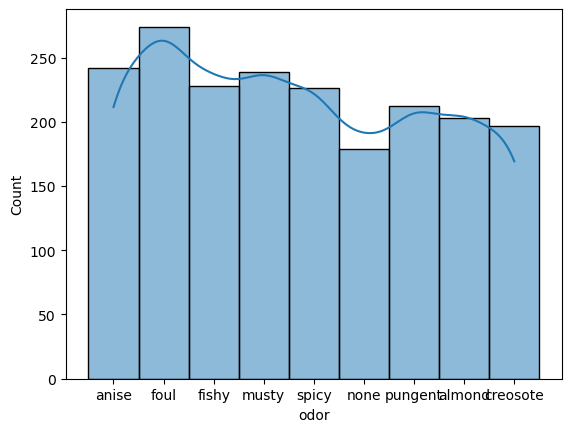

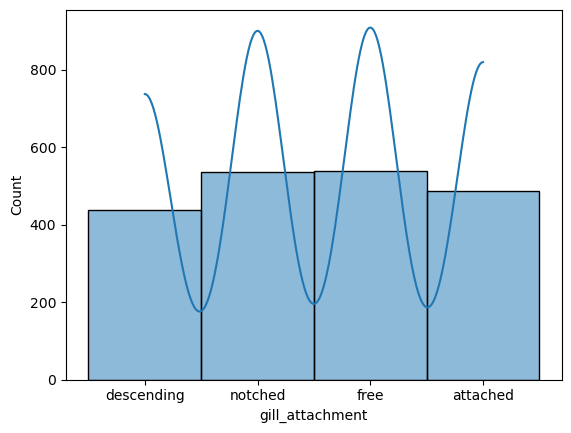

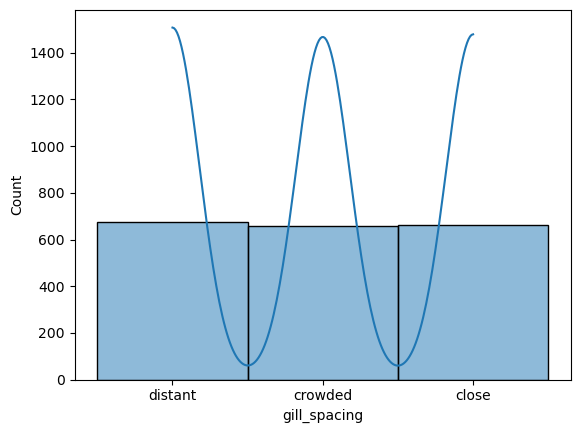

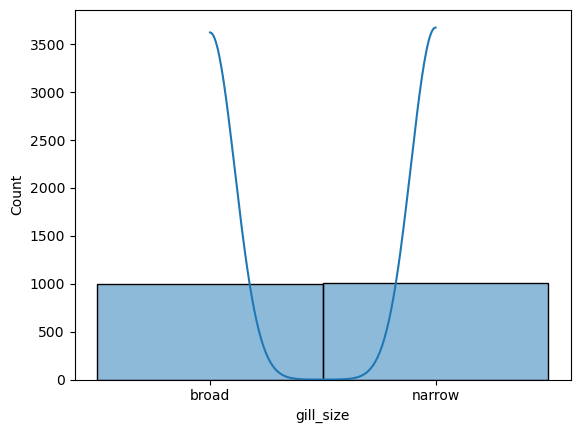

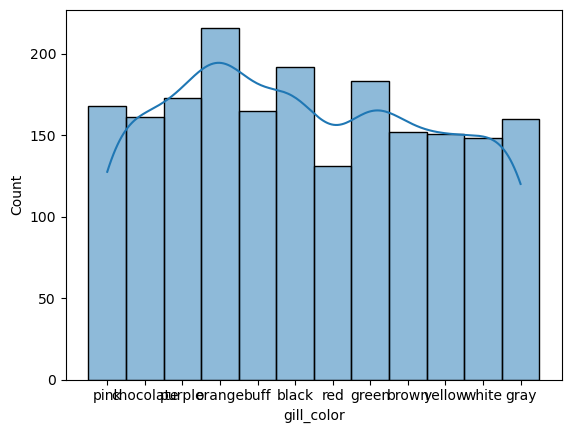

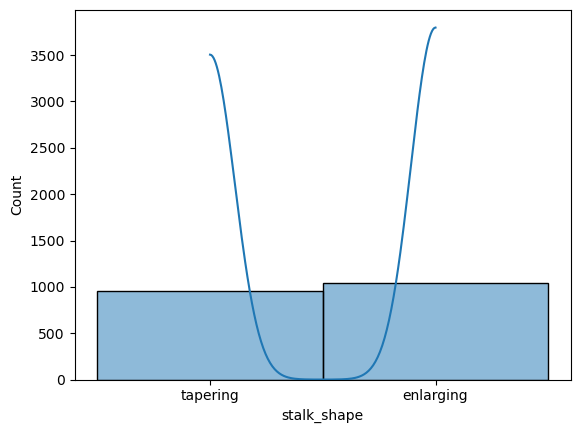

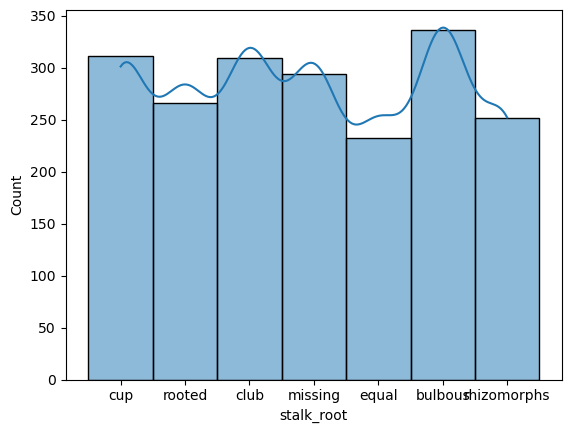

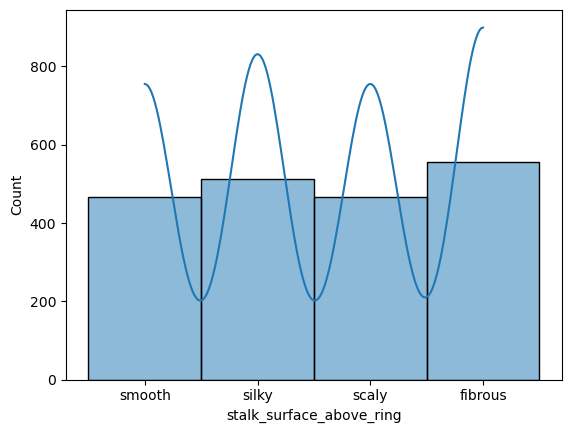

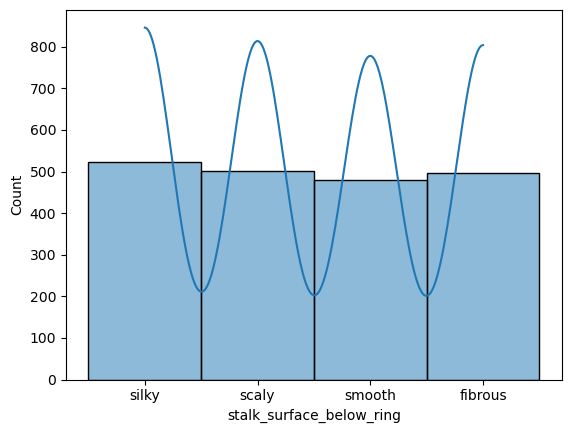

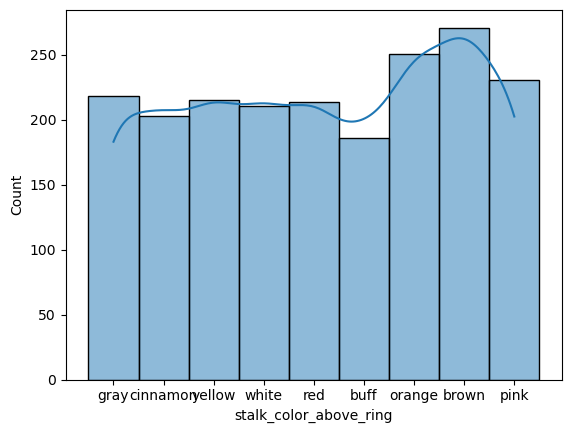

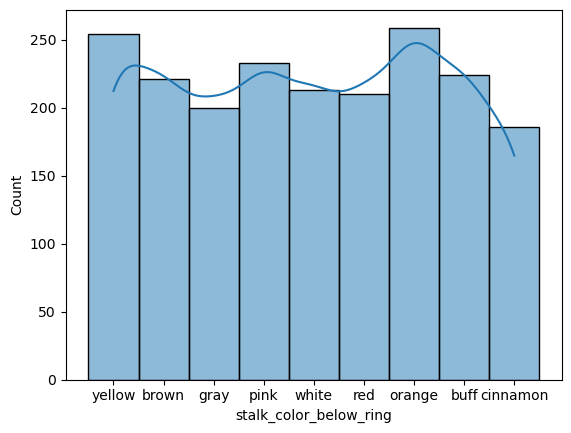

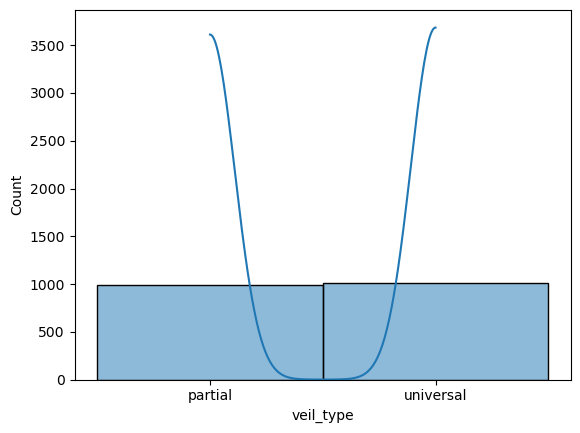

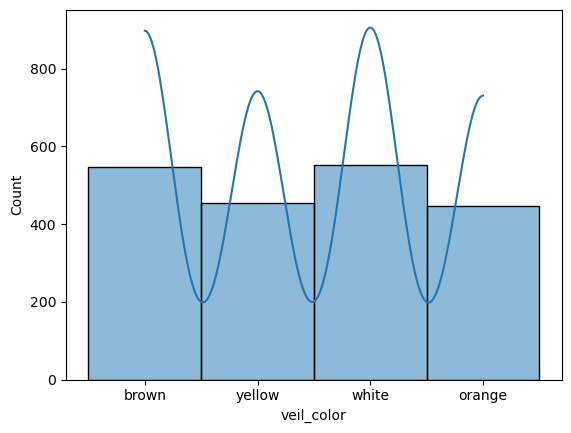

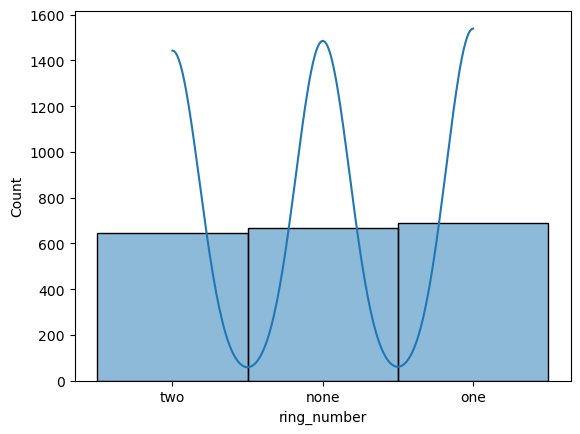

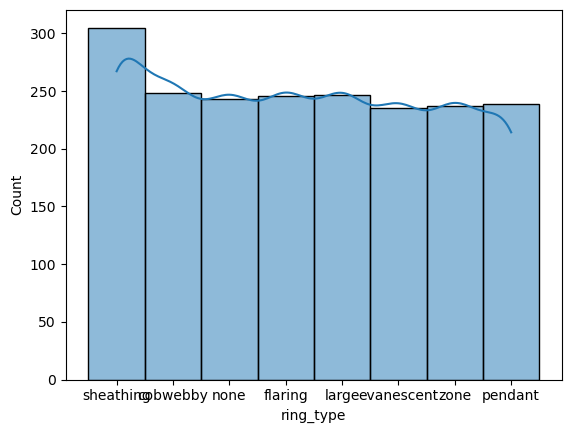

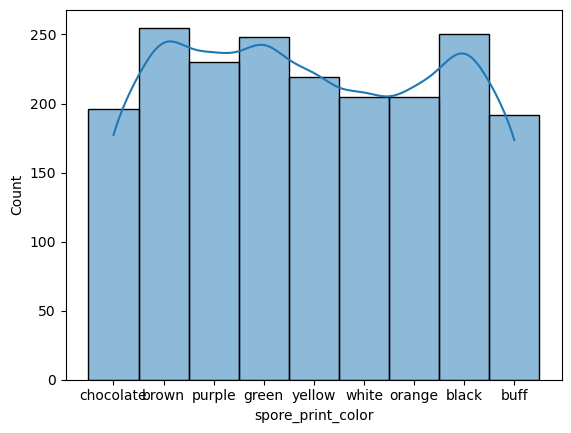

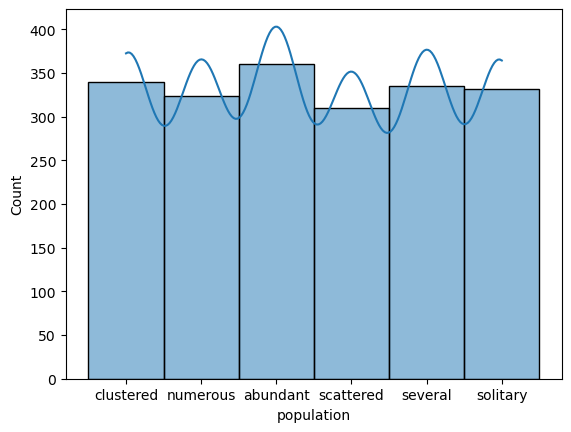

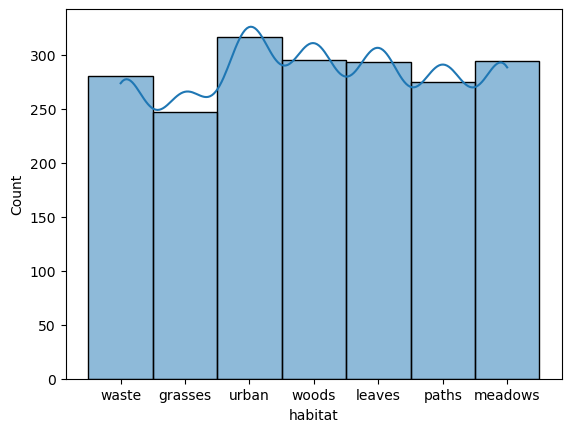

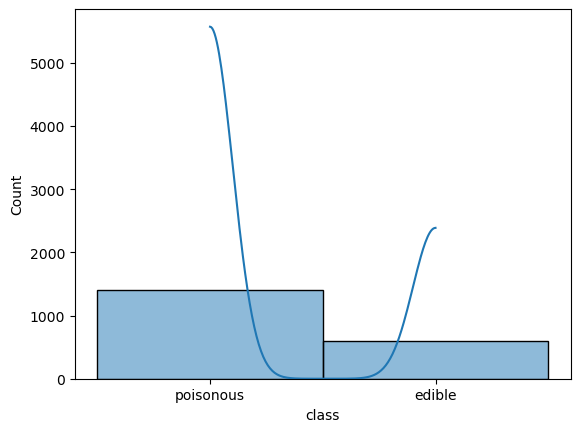

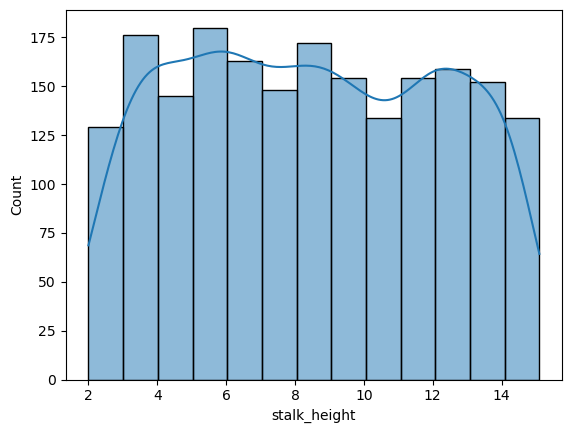

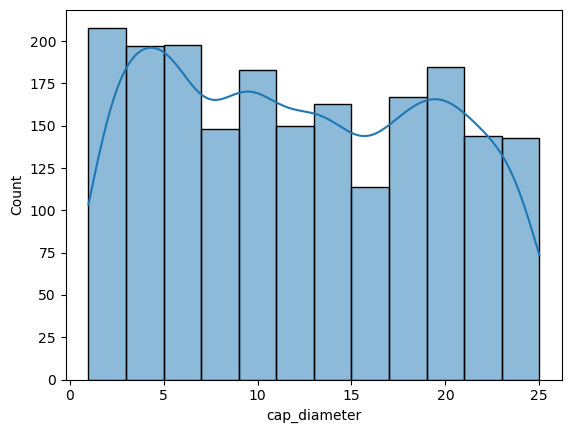

In [10]:
for col in Columns:
    plt.figure()
    sns.histplot(df[col],kde=True)
    plt.xlabel(col)
    plt.show()

#### Box plots for numerical columns

<Axes: >

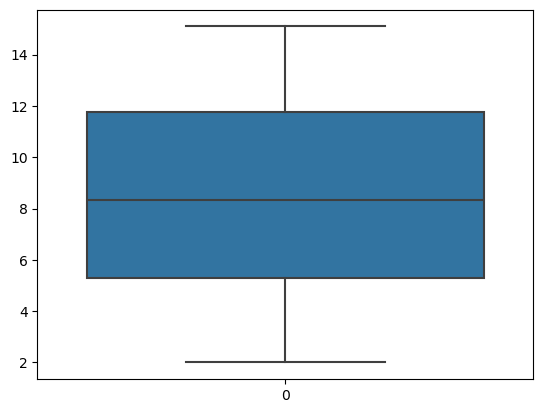

In [11]:
sns.boxplot(df['stalk_height'])

<Axes: >

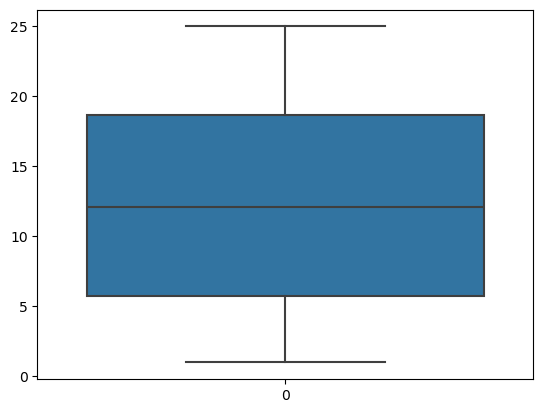

In [12]:
sns.boxplot(df['cap_diameter'])

In [13]:
df.shape

(2000, 25)

In [14]:
numerical_data = df.select_dtypes(include=['number'])
numerical_data.head()

,stalk_height,cap_diameter
0,14.276173,5.054983
1,3.952715,19.068319
2,9.054265,7.205884
3,5.226499,20.932692
4,14.037532,12.545245


In [15]:
numerical_data.corr()

,stalk_height,cap_diameter
stalk_height,1.000000,-0.003486
cap_diameter,-0.003486,1.000000


In [16]:
categorical_data = df.select_dtypes(include=['object'])
categorical_data.shape

(2000, 23)

In [17]:
categorical_data.ndim

2

In [18]:
categorical_data.columns

Index(['cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor',
       'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat', 'class'],
      dtype='object')

#### Data Transformation

In [19]:
## Label Encoding for categorical data

from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()


In [20]:
for col in categorical_data.columns:
    categorical_data[col] = LE.fit_transform(categorical_data[col])

In [21]:
categorical_data.head()

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class
0,4,2,7,0,1,1,2,0,7,1,...,3,8,0,0,2,6,3,1,5,1
1,4,0,6,0,1,3,1,1,3,0,...,2,0,1,0,2,6,1,2,5,0
2,3,1,5,1,4,1,1,0,8,1,...,8,3,1,3,2,6,6,0,5,1
3,0,2,4,1,3,3,0,0,6,0,...,8,5,0,3,2,0,4,1,0,1
4,3,3,8,1,5,2,1,1,6,0,...,3,7,1,2,0,4,8,1,4,1


In [22]:

from sklearn.preprocessing import StandardScaler
SS = StandardScaler()

numerical_data_ss = SS.fit_transform(numerical_data)
numerical_data = pd.DataFrame(numerical_data_ss,columns=numerical_data.columns)

In [23]:
numerical_data.head()

,stalk_height,cap_diameter
0,1.576459,-1.030123
1,-1.216463,0.958407
2,0.163717,-0.724904
3,-0.871852,1.222967
4,1.511897,0.032765


In [24]:
final_df = pd.concat([numerical_data,categorical_data],axis=1)
final_df.head()

,stalk_height,cap_diameter,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,...,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class
0,1.576459,-1.030123,4,2,7,0,1,1,2,0,...,3,8,0,0,2,6,3,1,5,1
1,-1.216463,0.958407,4,0,6,0,1,3,1,1,...,2,0,1,0,2,6,1,2,5,0
2,0.163717,-0.724904,3,1,5,1,4,1,1,0,...,8,3,1,3,2,6,6,0,5,1
3,-0.871852,1.222967,0,2,4,1,3,3,0,0,...,8,5,0,3,2,0,4,1,0,1
4,1.511897,0.032765,3,3,8,1,5,2,1,1,...,3,7,1,2,0,4,8,1,4,1


In [25]:
final_df.corr()

,stalk_height,cap_diameter,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,...,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class
stalk_height,1.000000,-0.003486,0.024540,0.043482,0.044086,0.064644,0.011217,-0.017367,0.016429,-0.003273,...,-0.002750,0.019794,-0.055314,0.001846,-0.027801,-0.003954,-0.011032,0.008697,0.037147,-0.013655
cap_diameter,-0.003486,1.000000,0.037743,0.016606,-0.000489,-0.046946,-0.051549,-0.039526,0.029169,-0.068743,...,0.036545,0.010712,-0.058645,-0.019931,-0.000066,-0.004415,0.005578,-0.091702,0.034205,-0.019707
cap_shape,0.024540,0.037743,1.000000,-0.003244,0.009615,-0.001190,-0.030119,0.015477,-0.048783,0.040497,...,-0.021350,0.027522,-0.039029,-0.017399,0.036999,0.010172,0.024596,0.003602,0.028388,0.001140
cap_surface,0.043482,0.016606,-0.003244,1.000000,0.003153,-0.021352,-0.021926,-0.010513,0.068918,-0.038490,...,-0.048534,-0.011742,-0.068705,0.040341,0.005855,0.017616,-0.042134,-0.003963,-0.038661,-0.046409
cap_color,0.044086,-0.000489,0.009615,0.003153,1.000000,0.016445,-0.065410,0.023835,-0.015628,0.009888,...,0.038920,0.036951,-0.020039,-0.036166,0.055593,0.021509,0.082155,-0.027551,-0.025568,-0.078029
bruises,0.064644,-0.046946,-0.001190,-0.021352,0.016445,1.000000,0.026274,0.009402,-0.004458,0.041851,...,0.009374,-0.077316,0.016775,-0.053680,-0.022588,-0.028750,-0.026481,0.012976,0.013392,-0.015498
odor,0.011217,-0.051549,-0.030119,-0.021926,-0.065410,0.026274,1.000000,-0.055214,-0.002847,-0.027313,...,-0.006393,-0.007103,0.028177,0.015397,-0.068819,0.033956,-0.057705,-0.011753,-0.051237,0.039536
gill_attachment,-0.017367,-0.039526,0.015477,-0.010513,0.023835,0.009402,-0.055214,1.000000,-0.063604,0.009386,...,0.011811,0.007839,-0.042727,-0.023648,0.080437,-0.006025,0.039356,-0.002649,0.005944,-0.028194
gill_spacing,0.016429,0.029169,-0.048783,0.068918,-0.015628,-0.004458,-0.002847,-0.063604,1.000000,-0.022650,...,-0.045491,0.003012,-0.016567,0.004960,0.024984,0.001516,0.016376,-0.004920,0.004055,0.046505
gill_size,-0.003273,-0.068743,0.040497,-0.038490,0.009888,0.041851,-0.027313,0.009386,-0.022650,1.000000,...,-0.067307,-0.025614,-0.029072,-0.016722,-0.005476,-0.028746,0.039395,0.018937,-0.004307,0.019858


##### Obsevation:
-    All features are very least correlated with each other.

##### Data Partition

In [26]:
X = final_df.drop(columns='class')
y = final_df['class']
X.head()

,stalk_height,cap_diameter,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,1.576459,-1.030123,4,2,7,0,1,1,2,0,...,2,3,8,0,0,2,6,3,1,5
1,-1.216463,0.958407,4,0,6,0,1,3,1,1,...,2,2,0,1,0,2,6,1,2,5
2,0.163717,-0.724904,3,1,5,1,4,1,1,0,...,2,8,3,1,3,2,6,6,0,5
3,-0.871852,1.222967,0,2,4,1,3,3,0,0,...,1,8,5,0,3,2,0,4,1,0
4,1.511897,0.032765,3,3,8,1,5,2,1,1,...,1,3,7,1,2,0,4,8,1,4


In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

#### MODEL FITTING WITH SVM USING LINEAR

In [28]:

from sklearn.svm import SVC
model = SVC(kernel='linear') #--> 70,70
model.fit(X_train,y_train)
y_pred_train = model.predict(X_train)
y_pred_test  = model.predict(X_test)


In [29]:
##STEP 6: METRICS

from sklearn.metrics import accuracy_score
ac1 = accuracy_score(y_train,y_pred_train)
print("Training Accuracy score:" , ac1.round(3))
ac2 = accuracy_score(y_test,y_pred_test)
print("Test Accuracy score:" , ac2.round(3))

Training Accuracy score: 0.7
Test Accuracy score: 0.7


In [30]:
# cross validation for SVM model

training_acc = []
test_acc = []

for i in range(1,100):
    X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3,random_state=i)
    model.fit(X_train,y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test  = model.predict(X_test)
    training_acc.append(accuracy_score(y_train,y_pred_train))
    test_acc.append(accuracy_score(y_test,y_pred_test))

import numpy as np
print("Cross validation - Training accuracy:" ,np.mean(training_acc).round(2))
print("Cross validation - Test accuracy:" ,np.mean(test_acc).round(2))

Cross validation - Training accuracy: 0.7
Cross validation - Test accuracy: 0.7


#### FITTING THE SVM MODER USING POLYNOMIAL

In [31]:


#model = SVC(kernel='poly',degree=1)  #-->70,70
#model = SVC(kernel='poly',degree=2)  #--> 71,70
#model = SVC(kernel='poly',degree=3)  #--> 80,73
#model = SVC(kernel='poly',degree=4)  #--> 52,47
#model = SVC(kernel='poly',degree=5)  #--> 96,82
#model = SVC(kernel='poly',degree=6)  #-->98,83
#model = SVC(kernel='poly',degree=7)  #-->98,84
model = SVC(kernel='poly',degree=8)  #-->99,84
#model = SVC(kernel='poly',degree=9)   #-->99,84
model.fit(X_train,y_train)
Y_pred_train = model.predict(X_train)
Y_pred_test  = model.predict(X_test)

In [32]:
from sklearn.metrics import accuracy_score
ac1 = accuracy_score(y_train,y_pred_train)
print("Training Accuracy score:" , ac1.round(3))
ac2 = accuracy_score(y_test,y_pred_test)
print("Test Accuracy score:" , ac2.round(3))

Training Accuracy score: 0.701
Test Accuracy score: 0.698


In [33]:
# Cross validation
training_acc = []
test_acc = []

for i in range(1,100):
    X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3,random_state=i)
    model.fit(X_train,y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test  = model.predict(X_test)
    training_acc.append(accuracy_score(y_train,y_pred_train))
    test_acc.append(accuracy_score(y_test,y_pred_test))

import numpy as np
print("Cross validation - Training accuracy:" ,np.mean(training_acc).round(2))
print("Cross validation - Test accuracy:" ,np.mean(test_acc).round(2))

Cross validation - Training accuracy: 0.99
Cross validation - Test accuracy: 0.84


#### CALUCULATING METRICS LIKE CONFUSION MATRIX,ACCURACY SCORE,PRECISION,RECALL,F1_SCORE,SPECIFICITY

In [34]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_pred_test)
cm

array([[109,  72],
       [ 27, 392]], dtype=int64)

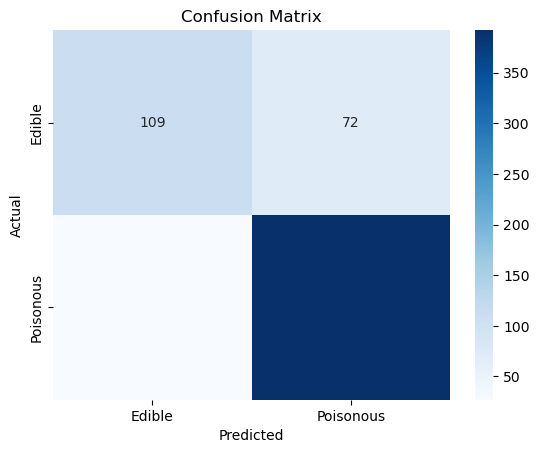

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Edible', 'Poisonous'], yticklabels=['Edible', 'Poisonous'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [36]:
ac = accuracy_score(y_test,y_pred_test)
print("Accuracy Score:",ac.round(2))

Accuracy Score: 0.84


In [37]:
from sklearn.metrics import recall_score, precision_score, f1_score
print("Sensitivity_score:", recall_score(y_test, y_pred_test).round(2))
print("precision_score:", precision_score(y_test, y_pred_test).round(2))
print("f1_score:", f1_score(y_test, y_pred_test).round(2))

Sensitivity_score: 0.94
precision_score: 0.84
f1_score: 0.89


In [38]:
TN = cm[0,0]
FP =cm[0,1]
TNR=TN/(TN+FP)
print("Specificity:",TNR.round(2))

Specificity: 0.6


#### Discuss practical implications of SVM in real-world classification tasks.
- SVMs (Support Vector Machines) are powerful machine learning models widely used for  classification tasks across various domains
- Here's a dive into the practical implications of SVMs in real-world applications
    1. High Accuracy
    2. Roboustness to Noise
    3. Generalization
    4. Dimensionality Reduction
